In [1]:
import pandas as pd
import numpy as np
import os
import re
from functools import reduce

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [3]:
path = '/Users/george/testData/bigcone/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_데이터_210803/01_제공데이터'


In [4]:
file_list = os.listdir(path)

In [5]:
file_list.sort()

In [6]:
file_list

['2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_경기일정_2021.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2018.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2019.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2020.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2021.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2021.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_팀.csv']

In [8]:
tracking = []
for ls in file_list[:4]:
    tracking.append(pd.read_csv(os.path.join(path,ls), encoding='cp949'))
    
    

In [9]:

tracking[0]



,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척
...,...,...,...,...,...,...,...,...,...,...,...
35024,2018,20181014OBLT0,181014_161746,75334,OB,9,161.12,-7.4,1루타,145.81,사직
35025,2018,20181014OBLT0,181014_162521,68205,OB,9,131.71,26.4,플라이,146.38,사직
35026,2018,20181014OBLT0,181014_162755,76509,LT,9,119.64,28.8,플라이,141.23,사직
35027,2018,20181014OBLT0,181014_162938,60523,LT,9,164.98,15.7,직선타,125.59,사직


In [10]:
tot_tracking = reduce(lambda left, right: pd.concat([left,right]), tracking)



In [11]:
tot_tracking



,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척
...,...,...,...,...,...,...,...,...,...,...,...
17959,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구
17960,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구
17961,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구
17962,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구


In [40]:
tot_tracking.shape



(120745, 11)

In [42]:
total = 0
for d in tracking:
    total+=d.shape[0]
total


120745

## hit result

<AxesSubplot:>

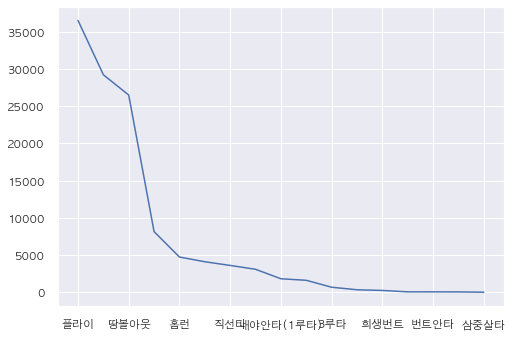

In [57]:
tot_tracking['HIT_RESULT'].value_counts().plot()


## barrel 타구 정의

In [12]:
barrel=['2루타','3루타','홈런','희생플라이']
not_barrel = ['병살타','인필드플라이','희생번트','삼중살타','번트아웃','번트안타','내야안타']


## angle 관련 데이터 Outlier많음

In [90]:
tot_tracking.groupby('HIT_RESULT')[['HIT_ANG_VER']].agg('min')



,HIT_ANG_VER
HIT_RESULT,
1루타,-34.0
2루타,-50.2
3루타,-19.5
내야안타(1루타),-52.4
땅볼아웃,-68.1
번트아웃,-62.7
번트안타,-61.9
병살타,-60.3
삼중살타,-13.9


In [97]:
tot_tracking.groupby('HIT_RESULT')[['HIT_ANG_VER']].agg(['min','max','median'])



HIT_ANG_VER             
                   min   max median
HIT_RESULT                         
1루타              -34.0  67.9   8.50
2루타              -50.2  65.4  17.10
3루타              -19.5  56.8  19.50
내야안타(1루타)        -52.4  81.7  -4.00
땅볼아웃             -68.1  80.0  -6.90
번트아웃             -62.7  66.6 -13.05
번트안타             -61.9  53.0 -11.25
병살타              -60.3  72.9  -6.40
삼중살타             -13.9 -13.4 -13.65
야수선택             -39.9  17.9  -8.25
인필드플라이            24.0  81.9  64.40
직선타               -0.3  25.2   8.35
파울플라이              4.3  89.8  71.60
플라이               -0.4  85.7  36.80
홈런                15.5  50.1  28.20
희생번트             -68.9  84.5 -16.80
희생플라이              9.9  80.8  31.00

In [58]:
tot_tracking['HIT_RESULT'].value_counts()

플라이          36540
1루타          29235
땅볼아웃         26507
2루타           8146
홈런            4732
파울플라이         4097
직선타           3602
병살타           3085
내야안타(1루타)     1810
희생플라이         1603
3루타            672
인필드플라이         331
희생번트           239
야수선택            52
번트안타            48
번트아웃            44
삼중살타             2
Name: HIT_RESULT, dtype: int64

In [62]:
barrel_data=tot_tracking[tot_tracking['HIT_RESULT'].isin(barrel)]
barrel_data

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
15,2018,20180324HHWO0,180324_150409,76746,WO,3,165.04,20.3,홈런,140.05,고척
18,2018,20180324HHWO0,180324_152334,67341,WO,4,151.98,18.4,2루타,132.66,고척
25,2018,20180324HHWO0,180324_155614,77564,WO,5,144.44,15.1,2루타,148.88,고척
35,2018,20180324HHWO0,180324_163814,68730,HH,7,134.39,3.7,3루타,135.10,고척
38,2018,20180324HHWO0,180324_165356,67341,WO,7,85.37,40.8,2루타,143.72,고척
...,...,...,...,...,...,...,...,...,...,...,...
17937,2021,20210711LTSS0,210711_183516,69453,SS,5,117.07,25.9,2루타,143.68,대구
17946,2021,20210711LTSS0,210711_190323,66838,SS,6,125.73,22.6,2루타,136.27,대구
17956,2021,20210711LTSS0,210711_193621,66838,SS,7,139.48,26.9,홈런,134.80,대구
17961,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구


In [66]:
barrel_data.loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL','STADIUM']].max()

HIT_VEL        180.81
HIT_ANG_VER      80.8
PIT_VEL        156.28
STADIUM            창원
dtype: object

In [67]:
barrel_data.loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL','STADIUM']].min()

HIT_VEL         72.3
HIT_ANG_VER    -50.2
PIT_VEL        96.91
STADIUM           고척
dtype: object

In [75]:
barrel_data.loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']]

,HIT_VEL,HIT_ANG_VER,PIT_VEL
15,165.04,20.3,140.05
18,151.98,18.4,132.66
25,144.44,15.1,148.88
35,134.39,3.7,135.10
38,85.37,40.8,143.72
...,...,...,...
17937,117.07,25.9,143.68
17946,125.73,22.6,136.27
17956,139.48,26.9,134.80
17961,146.84,33.4,134.10


In [77]:
barrel_data.groupby('STADIUM')[['HIT_VEL','HIT_ANG_VER','PIT_VEL']].agg('min')

,HIT_VEL,HIT_ANG_VER,PIT_VEL
STADIUM,,,
고척,72.30,-36.2,107.21
광주,77.05,-15.9,100.75
대구,79.89,-28.9,96.91
대전,85.16,-25.9,99.78
마산,93.67,-15.6,108.79
문학,89.80,-26.0,105.62
사직,87.18,-18.4,106.19
수원,80.73,-46.0,97.92
잠실,74.76,-50.2,99.02


In [79]:
barrel_data.groupby('STADIUM')[['HIT_VEL','HIT_ANG_VER','PIT_VEL']].agg('max')

,HIT_VEL,HIT_ANG_VER,PIT_VEL
STADIUM,,,
고척,175.96,59.4,154.77
광주,172.91,72.0,154.89
대구,176.69,59.4,153.82
대전,172.87,59.1,152.15
마산,173.41,52.9,152.43
문학,174.11,65.4,154.58
사직,176.35,61.3,155.84
수원,176.61,63.2,152.47
잠실,180.81,59.3,156.28


In [80]:
barrel_data.groupby('STADIUM')[['HIT_VEL','HIT_ANG_VER','PIT_VEL']].agg('median')

,HIT_VEL,HIT_ANG_VER,PIT_VEL
STADIUM,,,
고척,151.580,22.30,137.910
광주,150.395,22.50,138.450
대구,148.810,22.70,135.920
대전,149.580,22.40,137.460
마산,151.170,23.05,138.160
문학,151.820,22.90,138.120
사직,151.510,22.80,138.880
수원,150.730,23.30,135.670
잠실,153.335,21.60,139.065


In [82]:
barrel_data.groupby('STADIUM')[['HIT_VEL','HIT_ANG_VER','PIT_VEL']].describe().T

STADIUM                     고척           광주           대구           대전  \
HIT_VEL     count  1508.000000  1526.000000  1661.000000  1379.000000   
            mean    148.437367   147.597195   146.606635   147.332850   
            std      14.565891    13.285086    11.866102    12.573853   
            min      72.300000    77.050000    79.890000    85.160000   
            25%     142.510000   141.622500   141.090000   141.890000   
            50%     151.580000   150.395000   148.810000   149.580000   
            75%     157.982500   156.457500   154.600000   155.535000   
            max     175.960000   172.910000   176.690000   172.870000   
HIT_ANG_VER count  1508.000000  1526.000000  1661.000000  1379.000000   
            mean     21.487798    22.300262    22.445394    22.126468   
            std      11.538427    11.277217    10.950851    10.776944   
            min     -36.200000   -15.900000   -28.900000   -25.900000   
            25%      14.500000    16.125000    15.800000    16.050000   
            50%      22.300000    22.500000    22.700000    22.400000   
            75%      28.200000    28.900000    29.200000    28.700000   
            max      59.400000    72.000000    59.400000    59.100000   
PIT_VEL     count  1508.000000  1526.000000  1661.000000  1379.000000   
            mean    135.931598   136.454220   133.967586   135.539913   
            std       8.646551     8.506164     9.397065     8.865147   
            min     107.210000   100.750000    96.910000    99.780000   
            25%     129.885000   130.470000   127.550000   129.415000   
            50%     137.910000   138.450000   135.920000   137.460000   
            75%     142.810000   142.972500   141.540000   142.525000   
            max     154.770000   154.890000   153.820000   152.150000   

STADIUM                    마산           문학           사직           수원  \
HIT_VEL     count  486.000000  1519.000000  1593.000000  1533.000000   
            mean   149.800514   149.781060   149.403258   147.944175   
            std     11.648030    11.544301    11.769703    13.245188   
            min     93.670000    89.800000    87.180000    80.730000   
            25%    144.195000   144.105000   144.140000   142.580000   
            50%    151.170000   151.820000   151.510000   150.730000   
            75%    157.867500   157.645000   157.080000   156.510000   
            max    173.410000   174.110000   176.350000   176.610000   
HIT_ANG_VER count  486.000000  1519.000000  1593.000000  1533.000000   
            mean    22.694650    22.551810    22.014501    22.976712   
            std     10.504815    10.815862    11.277995    11.148002   
            min    -15.600000   -26.000000   -18.400000   -46.000000   
            25%     16.900000    16.000000    15.100000    16.400000   
            50%     23.050000    22.900000    22.800000    23.300000   
            75%     28.900000    29.300000    28.900000    29.600000   
            max     52.900000    65.400000    61.300000    63.200000   
PIT_VEL     count  486.000000  1519.000000  1593.000000  1533.000000   
            mean   136.046214   136.383147   137.052900   133.708017   
            std      8.886212     8.926848     8.479997     9.330316   
            min    108.790000   105.620000   106.190000    97.920000   
            25%    129.880000   130.400000   131.680000   127.210000   
            50%    138.160000   138.120000   138.880000   135.670000   
            75%    143.187500   143.215000   143.630000   140.820000   
            max    152.430000   154.580000   155.840000   152.470000   

STADIUM                     잠실           창원  
HIT_VEL     count  2778.000000  1170.000000  
            mean    150.774334   147.757009  
            std      13.496722    11.401419  
            min      74.760000    93.580000  
            25%     144.312500   142.145000  
            50%     153.335000   149.125000  
            75%     159.790000   155.357500  
     

In [100]:
tot_tracking['PIT_VEL'].describe()

count    120745.00000
mean        135.79528
std           9.21249
min          82.50000
25%         129.60000
50%         137.49000
75%         142.99000
max         159.40000
Name: PIT_VEL, dtype: float64

## 생각보다 투수의 공스피드와 나머지 데이터 간 관련성이 떨어짐

<AxesSubplot:>

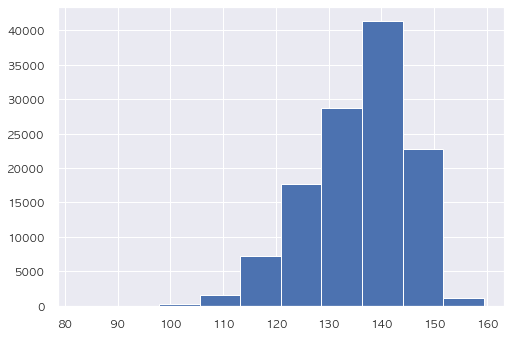

In [106]:
tot_tracking['PIT_VEL'].hist()

<AxesSubplot:>

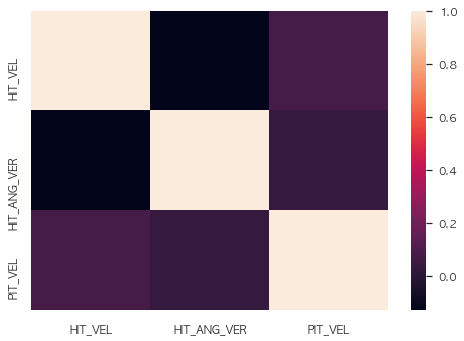

In [110]:
sns.heatmap(tot_tracking.loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']].corr())




<AxesSubplot:>

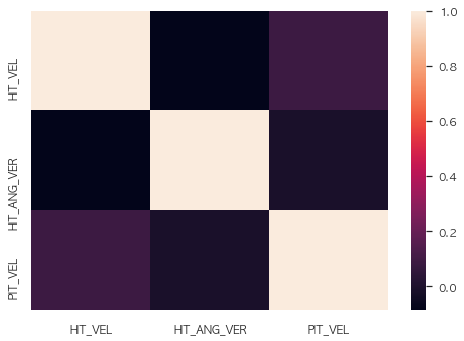

In [112]:
sns.heatmap(barrel_data.loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']].corr())



<AxesSubplot:>

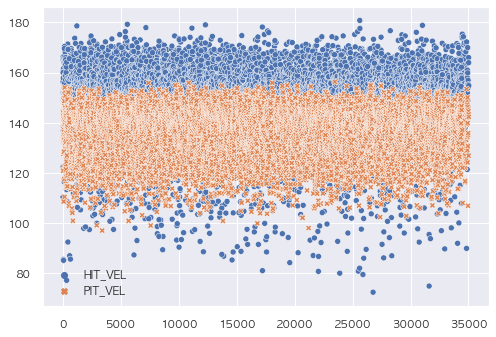

In [118]:
sns.scatterplot(data=barrel_data.loc[:,['HIT_VEL','PIT_VEL']])



<AxesSubplot:>

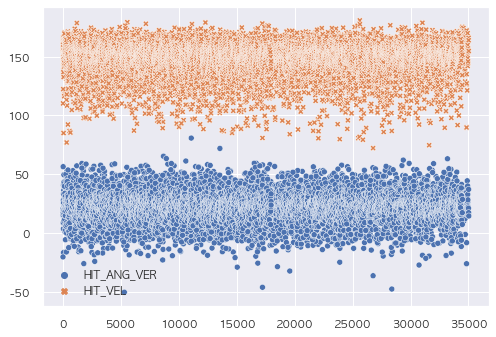

In [121]:
sns.scatterplot(data=barrel_data.loc[:,['HIT_ANG_VER','HIT_VEL']])

<AxesSubplot:>

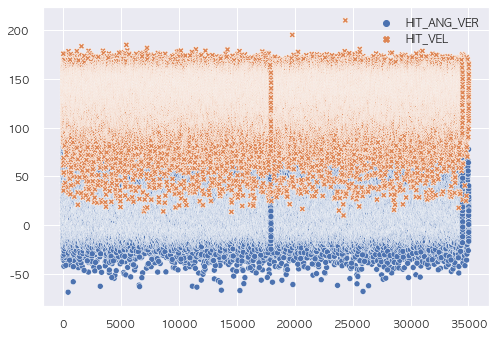

In [122]:
sns.scatterplot(data=tot_tracking.loc[:,['HIT_ANG_VER','HIT_VEL']])

## Outlier처리하고 사분위값을 기준으로 배럴 타구 정의하기

### 전체 타구

<AxesSubplot:>

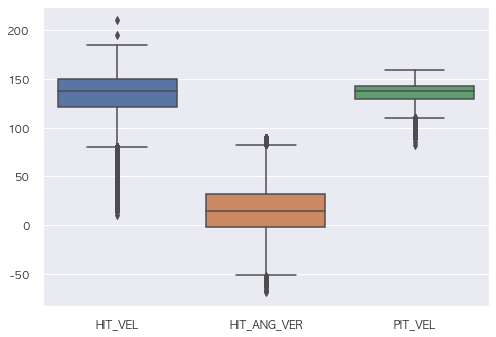

In [125]:
sns.boxplot(data=tot_tracking.loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']])



### outlier처리전 배럴타구

<AxesSubplot:>

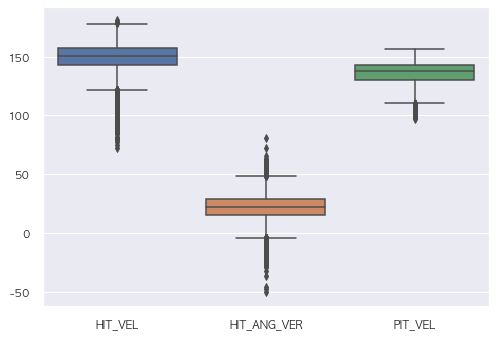

In [126]:
sns.boxplot(data=barrel_data.loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']])




### 배럴 타구 중 angle >0인 값만 선택

In [129]:
ang_on_plus=tot_tracking[tot_tracking['HIT_ANG_VER']>0]
ang_on_plus


,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척
...,...,...,...,...,...,...,...,...,...,...,...
17958,2021,20210711LTSS0,210711_194542,69508,LT,8,96.34,69.4,플라이,141.47,대구
17960,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구
17961,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구
17962,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구


In [131]:
barrel_on_plus=ang_on_plus[ang_on_plus['HIT_RESULT'].isin(barrel)]
barrel_on_plus

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
15,2018,20180324HHWO0,180324_150409,76746,WO,3,165.04,20.3,홈런,140.05,고척
18,2018,20180324HHWO0,180324_152334,67341,WO,4,151.98,18.4,2루타,132.66,고척
25,2018,20180324HHWO0,180324_155614,77564,WO,5,144.44,15.1,2루타,148.88,고척
35,2018,20180324HHWO0,180324_163814,68730,HH,7,134.39,3.7,3루타,135.10,고척
38,2018,20180324HHWO0,180324_165356,67341,WO,7,85.37,40.8,2루타,143.72,고척
...,...,...,...,...,...,...,...,...,...,...,...
17937,2021,20210711LTSS0,210711_183516,69453,SS,5,117.07,25.9,2루타,143.68,대구
17946,2021,20210711LTSS0,210711_190323,66838,SS,6,125.73,22.6,2루타,136.27,대구
17956,2021,20210711LTSS0,210711_193621,66838,SS,7,139.48,26.9,홈런,134.80,대구
17961,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구


<AxesSubplot:>

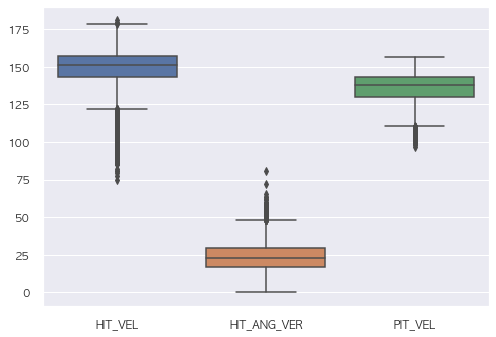

In [132]:
sns.boxplot(data=barrel_on_plus.loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']])

<AxesSubplot:>

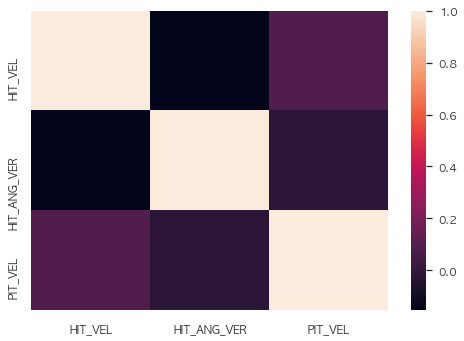

In [133]:
sns.heatmap(barrel_on_plus.loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']].corr())

### 전처리 후 배럴타구 

In [135]:
barrel_on_plus.groupby('HIT_RESULT')[['HIT_VEL','HIT_ANG_VER','PIT_VEL']].agg(['min','max','median'])


HIT_VEL                  HIT_ANG_VER              PIT_VEL          \
               min     max   median         min   max median     min     max   
HIT_RESULT                                                                     
2루타          74.76  180.81  149.815         0.1  65.4   17.8   98.92  156.28   
3루타         107.11  169.46  148.180         0.1  56.8   20.4   96.91  154.87   
홈런          131.13  179.02  155.430        15.5  50.1   28.2   97.92  155.90   
희생플라이        96.06  167.22  138.610         9.9  80.8   31.0  102.75  155.90   

                     
             median  
HIT_RESULT           
2루타         137.840  
3루타         137.285  
홈런          137.785  
희생플라이       136.950

In [154]:
barrel_on_plus.groupby('STADIUM')[['HIT_VEL','HIT_ANG_VER','PIT_VEL']].agg(['min','max','median','mean'])

HIT_VEL                              HIT_ANG_VER               \
            min     max   median        mean         min   max median   
STADIUM                                                                 
고척        79.35  175.96  151.610  148.537715         0.1  59.4   22.7   
광주        77.05  172.91  150.520  147.657967         0.1  72.0   23.1   
대구        88.35  176.69  148.860  146.754825         0.1  59.4   23.1   
대전        85.16  170.77  149.600  147.491206         0.2  59.1   22.9   
마산        93.67  173.41  151.250  149.901338         0.5  52.9   23.6   
문학        92.92  174.11  151.920  150.035193         0.4  65.4   23.1   
사직        87.18  176.35  151.675  149.637661         0.3  61.3   23.4   
수원        80.73  176.61  150.800  148.059099         0.2  63.2   23.7   
잠실        74.76  180.81  153.600  151.041894         0.2  59.3   22.1   
창원        93.58  179.02  149.140  147.751712         0.5  80.8   23.8   

                   PIT_VEL                               
              mean     min     max   median        mean  
STADIUM                                                  
고척       22.703116  107.21  154.77  137.890  135.942237  
광주       23.538056  100.75  154.89  138.500  136.515421  
대구       23.431234   96.91  153.82  135.905  133.943809  
대전       23.239638   99.78  152.15  137.640  135.671304  
마산       23.551380  108.79  152.43  138.280  136.135074  
문학       23.346721  105.62  154.58  138.060  136.350730  
사직       23.219725  106.19  155.84  139.055  137.126343  
수원       23.906052   97.92  152.47  135.670  133.696073  
잠실       22.713278   99.02  156.28  139.150  137.234836  
창원       23.755869   98.92  152.61  136.670  135.165649

array([[<AxesSubplot:title={'center':'HIT_VEL'}>,
        <AxesSubplot:title={'center':'HIT_ANG_VER'}>],
       [<AxesSubplot:title={'center':'PIT_VEL'}>, <AxesSubplot:>]],
      dtype=object)

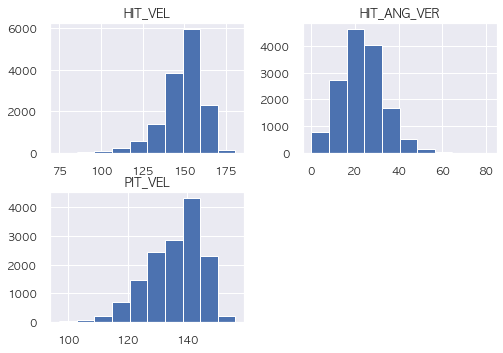

In [153]:
barrel_on_plus.loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']].hist()

## 전체 타구 구장 별 통계

### 배럴타구 아닌 통계

In [141]:
tot_tracking[tot_tracking['HIT_RESULT'].isin(not_barrel)].groupby('STADIUM')[['HIT_VEL','HIT_ANG_VER','PIT_VEL']].agg(['min','max','median'])

HIT_VEL                  HIT_ANG_VER              PIT_VEL          \
            min     max   median         min   max median     min     max   
STADIUM                                                                     
고척        15.64  179.07  134.870       -63.1  77.4  -6.90  111.47  154.65   
광주        20.59  172.39  132.215       -58.6  79.9  -6.40  104.31  153.00   
대구        24.09  168.61  127.860       -47.5  81.2  -5.70  104.56  150.74   
대전        25.59  173.59  131.060       -62.7  84.5  -4.95  108.03  149.39   
마산        16.59  171.09  116.930       -61.6  79.6  -4.75  115.97  151.51   
문학        20.87  180.23  131.800       -48.2  74.6  -6.50  108.64  153.46   
사직        18.11  174.94  131.555       -55.2  76.9  -4.50  108.85  150.08   
수원        17.74  168.57  134.400       -49.2  81.9  -6.50  109.50  149.45   
잠실        14.04  170.95  132.760       -68.9  81.0  -5.80  106.93  157.27   
창원        40.55  166.92  136.230       -27.0  80.2  -5.30  106.74  149.44   

                  
          median  
STADIUM           
고척       136.020  
광주       136.740  
대구       133.800  
대전       136.015  
마산       139.515  
문학       137.050  
사직       136.305  
수원       134.870  
잠실       138.360  
창원       135.850

In [137]:
tot_tracking.groupby('STADIUM')[['HIT_VEL','HIT_ANG_VER','PIT_VEL']].agg(['min','max','median'])

HIT_VEL                  HIT_ANG_VER              PIT_VEL          \
            min     max   median         min   max median     min     max   
STADIUM                                                                     
고척         9.88  195.25  138.250       -63.1  87.8   13.1  100.29  156.75   
광주        20.59  175.47  137.250       -63.7  89.2   15.0   82.50  155.69   
대구        24.09  181.87  135.810       -53.2  89.6   15.1   92.10  153.82   
대전        25.59  185.05  136.180       -62.8  89.8   14.9   90.58  154.06   
마산        16.59  178.55  136.000       -68.1  89.3   15.4  105.43  154.41   
문학        18.12  180.50  136.750       -62.3  89.3   15.3   93.48  156.48   
사직        14.28  176.35  138.965       -55.2  89.2   13.5   97.81  155.84   
수원        13.61  176.77  137.330       -61.0  89.6   13.6   97.92  153.23   
잠실        14.04  210.13  139.900       -68.9  89.5   14.5   85.59  159.40   
창원        38.68  179.02  137.280       -45.9  89.3   15.7   98.92  154.85   

                  
          median  
STADIUM           
고척       137.730  
광주       137.840  
대구       134.840  
대전       137.000  
마산       138.160  
문학       138.180  
사직       138.035  
수원       135.590  
잠실       139.310  
창원       136.525

### 1루타 타구 통계

In [143]:
tot_tracking[tot_tracking['HIT_RESULT']=='1루타'].groupby('STADIUM')[['HIT_VEL','HIT_ANG_VER','PIT_VEL']].agg(['min','max','median'])

HIT_VEL                  HIT_ANG_VER              PIT_VEL          \
            min     max   median         min   max median     min     max   
STADIUM                                                                     
고척        81.70  195.25  142.260       -30.2  64.8   7.50  101.06  156.75   
광주        78.26  174.55  141.760       -28.6  67.0   8.40   82.50  155.60   
대구        76.20  176.82  140.305       -31.7  67.9   8.20   92.10  153.42   
대전        77.29  185.05  140.250       -25.4  60.2   9.00   90.58  153.47   
마산        70.33  178.55  141.345       -23.1  61.1   8.80  105.43  152.50   
문학        69.20  176.05  142.055       -28.8  62.6   8.50   99.98  154.58   
사직        73.27  175.06  144.230       -34.0  58.4   8.30   97.81  154.56   
수원        79.58  176.10  142.820       -29.6  63.9   8.20  104.35  153.23   
잠실        79.46  175.74  144.070       -31.1  65.6   9.00   99.36  157.16   
창원        73.50  175.91  142.320       -22.6  60.5   8.45  104.34  153.80   

                  
          median  
STADIUM           
고척       138.175  
광주       137.610  
대구       135.175  
대전       136.930  
마산       138.245  
문학       138.175  
사직       138.070  
수원       135.360  
잠실       139.330  
창원       136.790

# 배럴 타구 정의 angle 16 - 30      speed 143 -157 

In [155]:
barrel_on_plus.loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']].agg(['min','max','median','mean']).T




,min,max,median,mean
HIT_VEL,74.76,180.81,151.01,148.814620
HIT_ANG_VER,0.10,80.80,23.00,23.268703
PIT_VEL,96.91,156.28,137.70,135.872369


In [146]:
barrel_on_plus.loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']].describe().T



,count,mean,std,min,25%,50%,75%,max
HIT_VEL,14583.0,148.814620,12.614116,74.76,143.06,151.01,157.150,180.81
HIT_ANG_VER,14583.0,23.268703,9.836933,0.10,16.60,23.00,29.200,80.80
PIT_VEL,14583.0,135.872369,9.050825,96.91,129.84,137.70,142.855,156.28


<AxesSubplot:>

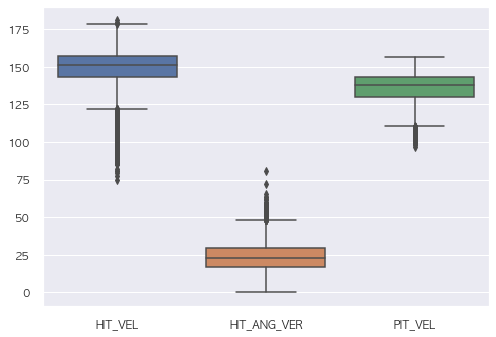

In [152]:
sns.boxplot(data=barrel_on_plus.loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']])



### 배럴타구 아닌 타구들 통계치

In [160]:
tot_tracking[tot_tracking['HIT_RESULT'].isin(not_barrel)].loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']].describe().T



,count,mean,std,min,25%,50%,75%,max
HIT_VEL,3749.0,122.760784,34.085270,14.04,108.12,131.94,147.63,180.23
HIT_ANG_VER,3749.0,-1.259723,23.126609,-68.90,-12.30,-5.80,0.30,84.50
PIT_VEL,3749.0,135.376103,8.715159,104.31,129.59,136.55,142.35,157.27


<AxesSubplot:>

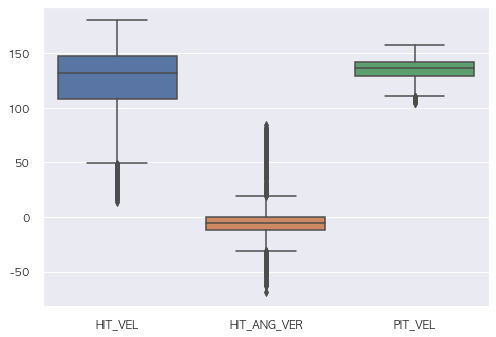

In [161]:
sns.boxplot(data=tot_tracking[tot_tracking['HIT_RESULT'].isin(not_barrel)].loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']])

In [157]:
ang_on_plus.loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']].agg(['min','max','median','mean']).T

,min,max,median,mean
HIT_VEL,9.88,180.81,137.28,134.086333
HIT_ANG_VER,0.10,89.80,23.50,27.563412
PIT_VEL,82.50,159.40,137.73,135.905702


### 1루타 결과 

In [163]:
tot_tracking[tot_tracking['HIT_RESULT']=='1루타'].loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']].describe().T
'
'

,count,mean,std,min,25%,50%,75%,max
HIT_VEL,29235.0,138.463661,18.343727,69.2,126.49,142.39,152.60,195.25
HIT_ANG_VER,29235.0,8.119682,11.573027,-34.0,0.50,8.50,14.20,67.90
PIT_VEL,29235.0,135.863566,9.161377,82.5,129.65,137.55,142.99,157.16


<AxesSubplot:>

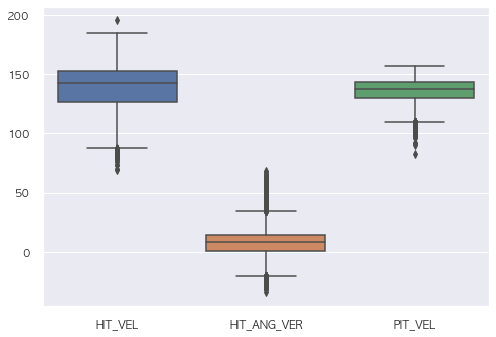

In [168]:
sns.boxplot(data=tot_tracking[tot_tracking['HIT_RESULT']=='1루타'].loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']])

### 플라이 결과

In [165]:
tot_tracking[tot_tracking['HIT_RESULT']=='플라이'].loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']].describe().T


,count,mean,std,min,25%,50%,75%,max
HIT_VEL,36540.0,131.195242,17.116513,13.61,122.49,133.92,143.13,178.54
HIT_ANG_VER,36540.0,39.004042,15.519426,-0.40,26.40,36.80,49.90,85.70
PIT_VEL,36540.0,136.065161,9.269781,88.29,129.84,138.04,143.23,159.40


<AxesSubplot:>

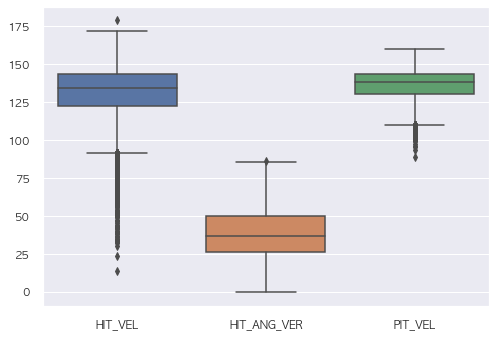

In [169]:
sns.boxplot(data=tot_tracking[tot_tracking['HIT_RESULT']=='플라이'].loc[:,['HIT_VEL','HIT_ANG_VER','PIT_VEL']])

In [170]:
player = []
for ls in file_list[5:9]:
    player.append(pd.read_csv(os.path.join(path,ls), encoding='cp949'))

In [171]:
tot_players = reduce(lambda left, right: pd.concat([left,right]), player)

In [172]:
tot_players

,GYEAR,PCODE,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2018,60100,백창수,HH,외,30,5000만원
1,2018,60105,배민관,LG,투,26,3200만원
2,2018,60140,신정락,LG,투,31,10500만원
3,2018,60146,이승현,SS,투,26,7000만원
4,2018,60181,김지용,LG,투,30,9000만원
...,...,...,...,...,...,...,...
642,2021,79456,이지영,WO,포,35,30000만원
643,2021,79545,진명호,LT,투,32,7500만원
644,2021,79608,안치홍,LT,내,31,29000만원
645,2021,79764,장민재,HH,투,31,10000만원


In [14]:
bet = []
for ls in file_list[9:13]:
    bet.append(pd.read_csv(os.path.join(path,ls), encoding='cp949'))

In [15]:
tot_bets = reduce(lambda left, right: pd.concat([left,right]), bet)

In [16]:
tot_bets

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021,79290,4,8,8,0.125,1,0,1,0.125,0,0,2,0,0,0
242,2021,79365,73,261,219,0.265,58,16,117,0.534,1,32,69,0,6,5
243,2021,79402,70,278,237,0.211,50,1,61,0.257,0,30,26,0,3,7
244,2021,79456,62,135,124,0.274,34,0,38,0.306,2,7,11,1,1,5


In [187]:
tot_bets.columns.to_list()[2:]

['GAMENUM',
 'PA',
 'AB',
 'BA',
 'HIT',
 'HR',
 'TOTB',
 'SLG',
 'SF',
 'BB',
 'KK',
 'IB',
 'HP',
 'GD']

In [33]:
tot_bets.groupby(['PCODE'])[tot_bets.columns.to_list()[2:]].agg('mean').astype('float32').round()

,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD
PCODE,,,,,,,,,,,,,,
50054,46.0,52.0,47.0,0.0,10.0,0.0,11.0,0.0,0.0,4.0,10.0,0.0,2.0,0.0
50066,26.0,32.0,30.0,0.0,6.0,1.0,11.0,0.0,0.0,2.0,11.0,0.0,0.0,1.0
50150,15.0,22.0,20.0,0.0,6.0,0.0,7.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0
50165,84.0,350.0,308.0,0.0,82.0,23.0,166.0,1.0,2.0,36.0,90.0,2.0,3.0,4.0
50167,14.0,19.0,16.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79530,20.0,32.0,29.0,0.0,5.0,0.0,7.0,0.0,0.0,2.0,10.0,0.0,0.0,2.0
79608,104.0,416.0,370.0,0.0,118.0,10.0,175.0,0.0,5.0,34.0,43.0,1.0,4.0,10.0
79705,44.0,81.0,69.0,0.0,16.0,2.0,27.0,0.0,1.0,8.0,19.0,0.0,1.0,2.0


In [40]:
tot_bets.groupby('PCODE')['GAMENUM'].agg(sum).describe()


count    453.000000
mean     140.609272
std      147.440417
min        1.000000
25%       21.000000
50%       79.000000
75%      229.000000
max      505.000000
Name: GAMENUM, dtype: float64

<AxesSubplot:xlabel='GAMENUM'>

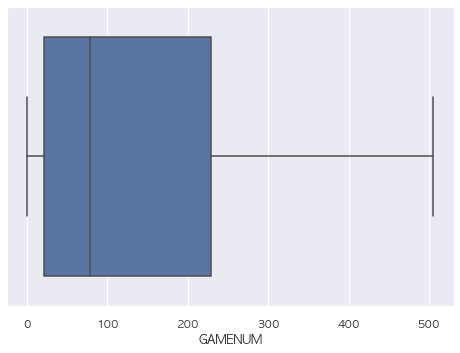

In [54]:
sns.boxplot(tot_bets.groupby('PCODE')['GAMENUM'].agg('sum'))



In [67]:
tot_bets[tot_bets.GAMENUM<=30]

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0
9,2018,60648,4,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0
10,2018,60805,2,2,0,0.000,0,0,0,0.000,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,2021,78361,25,32,28,0.250,7,0,7,0.250,0,4,7,0,0,0
232,2021,78629,20,76,61,0.164,10,0,11,0.180,1,9,22,0,5,2
233,2021,78643,8,26,21,0.095,2,1,5,0.238,0,4,4,0,1,1
234,2021,78813,3,6,5,0.000,0,0,0,0.000,0,1,1,0,0,0


In [13]:
tot_tracking


,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척
...,...,...,...,...,...,...,...,...,...,...,...
17959,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구
17960,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구
17961,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구
17962,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구


In [26]:
tot_tracking['DATE']=pd.to_datetime(tot_tracking['G_ID'].str[:8], format='%Y%m%d')


In [28]:
tot_tracking[tot_tracking['PCODE']==62797]



,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,date
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척,2018-03-24
10,2018,20180324HHWO0,180324_145431,62797,HH,3,63.08,-34.8,땅볼아웃,145.41,고척,2018-03-24
24,2018,20180324HHWO0,180324_154534,62797,HH,5,133.33,3.0,1루타,145.83,고척,2018-03-24
37,2018,20180324HHWO0,180324_165010,62797,HH,7,104.23,68.0,플라이,144.99,고척,2018-03-24
46,2018,20180324HHWO0,180324_173551,62797,HH,9,81.18,13.7,땅볼아웃,151.40,고척,2018-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...
29751,2019,20190908LTHH0,190908_171931,62797,HH,8,129.73,-9.8,땅볼아웃,136.81,대전,2019-09-08
7818,2020,20200612OBHH0,200612_204226,62797,HH,7,138.70,-4.5,1루타,139.19,대전,2020-06-12
8058,2020,20200613OBHH0,200613_184952,62797,HH,2,156.05,-9.4,땅볼아웃,125.10,대전,2020-06-13
8066,2020,20200613OBHH0,200613_204714,62797,HH,4,67.31,5.9,내야안타(1루타),145.30,대전,2020-06-13


In [102]:
tot_tracking[tot_tracking['HIT_VEL'].between(143.0,157.0) &
             tot_tracking['HIT_ANG_VER'].between(16,30)
             ].

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,date
12,2018,20180324HHWO0,180324_145647,71752,HH,3,155.49,21.0,1루타,144.87,고척,2018-03-24
18,2018,20180324HHWO0,180324_152334,67341,WO,4,151.98,18.4,2루타,132.66,고척,2018-03-24
52,2018,20180324KTHT0,180324_143322,74215,KT,2,150.00,17.5,플라이,143.34,광주,2018-03-24
57,2018,20180324KTHT0,180324_145258,68050,KT,3,148.37,24.9,홈런,146.59,광주,2018-03-24
74,2018,20180324KTHT0,180324_155347,67025,KT,6,147.62,27.7,홈런,139.18,광주,2018-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...
17863,2021,20210711HHSK0,210711_190336,76802,SK,6,145.83,22.2,홈런,136.25,문학,2021-07-11
17873,2021,20210711HHSK0,210711_194942,71837,SK,8,151.79,17.2,2루타,147.15,문학,2021-07-11
17881,2021,20210711KTHT0,210711_174916,64166,KT,2,149.05,17.6,플라이,145.20,광주,2021-07-11
17924,2021,20210711LTSS0,210711_174543,66838,SS,2,149.83,18.6,희생플라이,144.86,대구,2021-07-11


In [103]:
# tot_bets => 데이터 다시 구해야 해 왜냐 준 데이터가 연도별로 agg 되있기 때문,
#시계열 안쓰더라도 전 달 데이터로 예측을 하면 좋지않을까 

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021,79290,4,8,8,0.125,1,0,1,0.125,0,0,2,0,0,0
242,2021,79365,73,261,219,0.265,58,16,117,0.534,1,32,69,0,6,5
243,2021,79402,70,278,237,0.211,50,1,61,0.257,0,30,26,0,3,7
244,2021,79456,62,135,124,0.274,34,0,38,0.306,2,7,11,1,1,5


In [106]:
tot_tracking.HIT_RESULT.value_counts()

플라이          36540
1루타          29235
땅볼아웃         26507
2루타           8146
홈런            4732
파울플라이         4097
직선타           3602
병살타           3085
내야안타(1루타)     1810
희생플라이         1603
3루타            672
인필드플라이         331
희생번트           239
야수선택            52
번트안타            48
번트아웃            44
삼중살타             2
Name: HIT_RESULT, dtype: int64

In [10]:
tot_bets

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021,79290,4,8,8,0.125,1,0,1,0.125,0,0,2,0,0,0
242,2021,79365,73,261,219,0.265,58,16,117,0.534,1,32,69,0,6,5
243,2021,79402,70,278,237,0.211,50,1,61,0.257,0,30,26,0,3,7
244,2021,79456,62,135,124,0.274,34,0,38,0.306,2,7,11,1,1,5


In [11]:
tot_bets[tot_bets['GYEAR']==2021]

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD
0,2021,50054,25,28,25,0.200,5,0,5,0.200,0,1,5,0,2,0
1,2021,50150,7,12,10,0.100,1,0,1,0.100,0,1,2,0,1,0
2,2021,50165,51,205,185,0.243,45,8,78,0.422,0,18,43,0,2,2
3,2021,50167,14,19,16,0.125,2,0,2,0.125,0,1,7,0,1,0
4,2021,50202,33,24,20,0.100,2,0,2,0.100,0,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021,79290,4,8,8,0.125,1,0,1,0.125,0,0,2,0,0,0
242,2021,79365,73,261,219,0.265,58,16,117,0.534,1,32,69,0,6,5
243,2021,79402,70,278,237,0.211,50,1,61,0.257,0,30,26,0,3,7
244,2021,79456,62,135,124,0.274,34,0,38,0.306,2,7,11,1,1,5


In [15]:
file_list

['2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_경기일정_2021.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2018.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2019.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2020.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2021.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2021.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_팀.csv']

In [12]:
team = pd.read_csv(os.path.join(path,file_list[4]),encoding='cp949')

In [13]:
team

,G_ID,GDAY_DS,VISIT_KEY,HOME_KEY,HEADER_NO,GWEEK,STADIUM,ACG
0,20210403SSWO0,20210403.0,SS,WO,0,토,고척,1
1,20210404HHKT0,20210404.0,HH,KT,0,일,수원,1
2,20210404HTOB0,20210404.0,HT,OB,0,일,잠실,1
3,20210404LGNC0,20210404.0,LG,NC,0,일,창원,1
4,20210404LTSK0,20210404.0,LT,SK,0,일,문학,1
...,...,...,...,...,...,...,...,...
715,NaN,NaN,KT,WO,0,NaN,고척,2
716,NaN,NaN,NC,WO,0,NaN,고척,2
717,NaN,NaN,NC,WO,0,NaN,고척,2
718,NaN,NaN,NC,WO,0,NaN,고척,2


In [19]:
tot_bets[tot_bets.GYEAR==2019]

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD
0,2019,60100,16,48,44,0.227,10,0,13,0.295,0,0,18,0,2,1
1,2019,60184,3,2,2,0.000,0,0,0,0.000,0,0,1,0,0,0
2,2019,60288,8,13,13,0.231,3,0,4,0.308,0,0,6,0,0,1
3,2019,60343,30,43,40,0.125,5,0,5,0.125,0,2,11,0,1,0
4,2019,60523,88,222,190,0.226,43,2,55,0.289,1,23,47,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2019,79456,106,331,308,0.282,87,1,97,0.315,1,15,28,1,1,14
287,2019,79465,30,80,71,0.225,16,0,17,0.239,1,6,15,0,2,0
288,2019,79530,18,49,44,0.136,6,0,8,0.182,1,2,15,0,0,3
289,2019,79608,105,408,362,0.315,114,5,149,0.412,5,40,37,1,1,9


In [21]:
team.VISIT_KEY.value_counts()

LT    72
OB    72
LG    72
HH    72
NC    72
SS    72
SK    72
KT    72
WO    72
HT    72
Name: VISIT_KEY, dtype: int64

In [27]:
team.G_ID.notnull()

0       True
1       True
2       True
3       True
4       True
       ...  
715    False
716    False
717    False
718    False
719    False
Name: G_ID, Length: 720, dtype: bool

In [28]:
team

,G_ID,GDAY_DS,VISIT_KEY,HOME_KEY,HEADER_NO,GWEEK,STADIUM,ACG
0,20210403SSWO0,20210403.0,SS,WO,0,토,고척,1
1,20210404HHKT0,20210404.0,HH,KT,0,일,수원,1
2,20210404HTOB0,20210404.0,HT,OB,0,일,잠실,1
3,20210404LGNC0,20210404.0,LG,NC,0,일,창원,1
4,20210404LTSK0,20210404.0,LT,SK,0,일,문학,1
...,...,...,...,...,...,...,...,...
715,NaN,NaN,KT,WO,0,NaN,고척,2
716,NaN,NaN,NC,WO,0,NaN,고척,2
717,NaN,NaN,NC,WO,0,NaN,고척,2
718,NaN,NaN,NC,WO,0,NaN,고척,2


In [29]:
file_list[-1]

['2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_경기일정_2021.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2018.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2019.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2020.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2021.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2021.csv',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_팀.csv']

In [41]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   G_ID       639 non-null    object 
 1   GDAY_DS    639 non-null    float64
 2   VISIT_KEY  720 non-null    object 
 3   HOME_KEY   720 non-null    object 
 4   HEADER_NO  720 non-null    int64  
 5   GWEEK      639 non-null    object 
 6   STADIUM    720 non-null    object 
 7   ACG        720 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 45.1+ KB


In [45]:
len(team.VISIT_KEY.value_counts()) 

10

In [49]:
team.tail(100)

,G_ID,GDAY_DS,VISIT_KEY,HOME_KEY,HEADER_NO,GWEEK,STADIUM,ACG
620,20211005NCKT0,20211005.0,NC,KT,0,화,수원,2
621,20211005OBHH0,20211005.0,OB,HH,0,화,대전,2
622,20211005SKLG0,20211005.0,SK,LG,0,화,잠실,2
623,20211005SSWO0,20211005.0,SS,WO,0,화,고척,2
624,20211006HTLT0,20211006.0,HT,LT,0,수,사직,2
...,...,...,...,...,...,...,...,...
715,NaN,NaN,KT,WO,0,NaN,고척,2
716,NaN,NaN,NC,WO,0,NaN,고척,2
717,NaN,NaN,NC,WO,0,NaN,고척,2
718,NaN,NaN,NC,WO,0,NaN,고척,2


In [ ]:
team